In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans

In [2]:
fb_data = pd.read_csv("data/angle_full_body.csv")

# LDA

In [3]:
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit KMeans to the data
kmeans.fit(fb_data)

# Get cluster assignments and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

/home/webis/miniconda3/envs/pifpaf/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [4]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(fb_data, labels)

In [5]:
centers_lda = lda.transform(centers)

/home/webis/miniconda3/envs/pifpaf/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


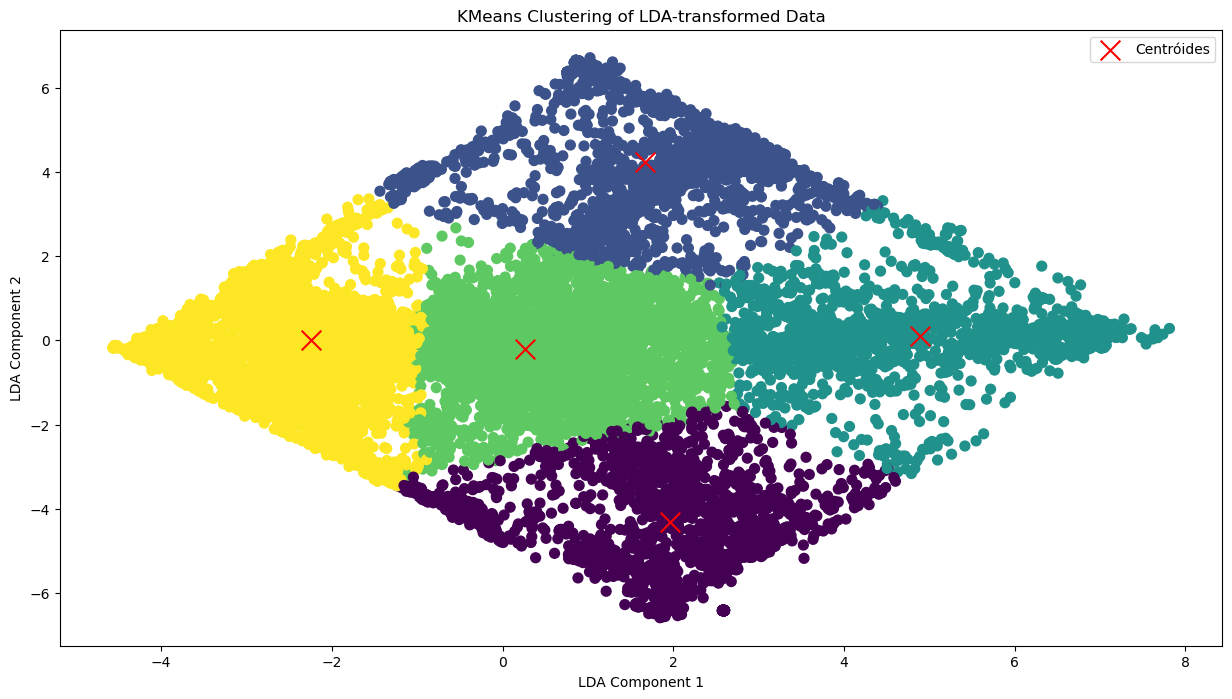

In [36]:
# Plot the clusters
plt.figure(figsize=(15, 8))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centers_lda[:, 0], centers_lda[:, 1], c='red', marker='x', s=200, label='Centróides')
plt.title('KMeans Clustering of LDA-transformed Data')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
#plt.colorbar(label='Cluster')
plt.legend(loc='upper right')
plt.show()

# T-SNE

In [8]:
from sklearn.manifold import TSNE

In [10]:
t_sne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3)

X_tsne = t_sne.fit_transform(fb_data)
Xc_tsne = t_sne.fit_transform(centers)

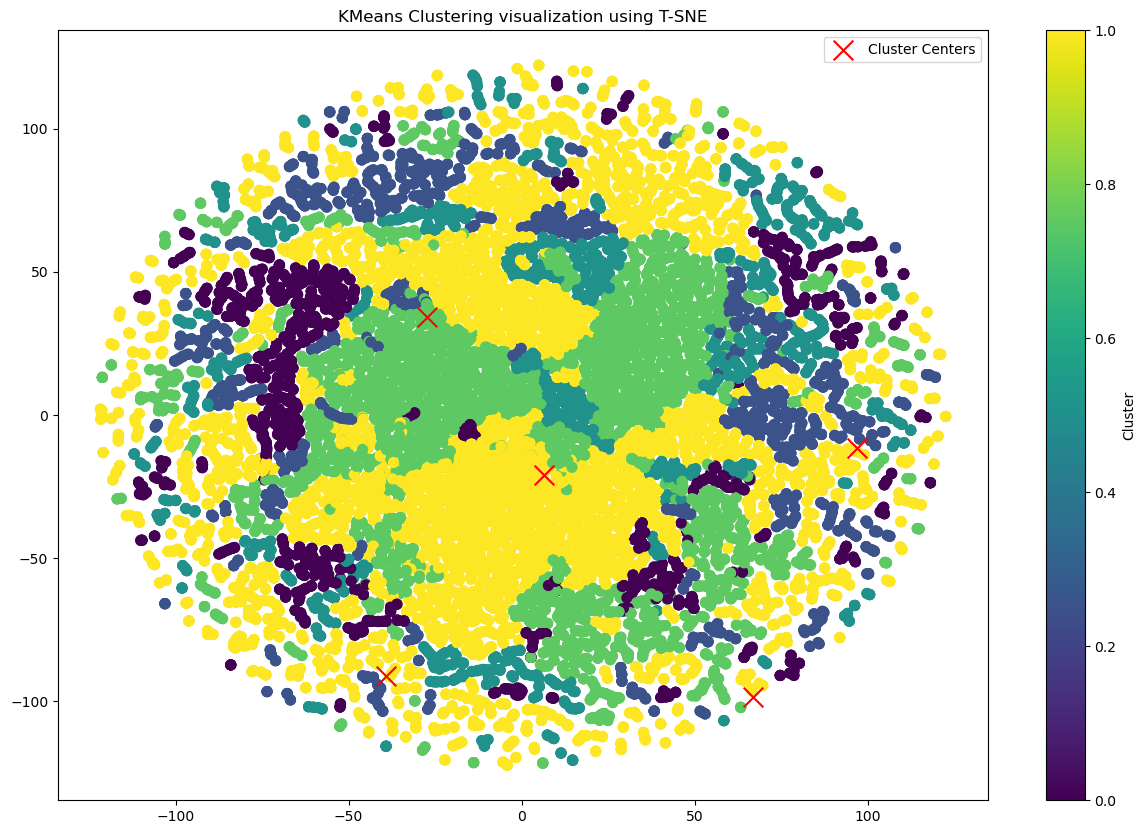

In [37]:
# Plot the clusters
plt.figure(figsize=(15, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(Xc_tsne[:, 0], Xc_tsne[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.title('KMeans Clustering visualization using T-SNE')
plt.colorbar(label='Cluster')
plt.legend(loc='upper right')
plt.show()

# UMAP

In [38]:
import umap

reducer = umap.UMAP(n_neighbors=30, min_dist=0.1, n_components=2, metric='euclidean')

X_umap = reducer.fit_transform(fb_data)
Xc_umap = reducer.fit_transform(centers)

/home/webis/miniconda3/envs/pifpaf/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/webis/miniconda3/envs/pifpaf/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/webis/miniconda3/envs/pifpaf/lib/python3.8/site-packages/umap/dist

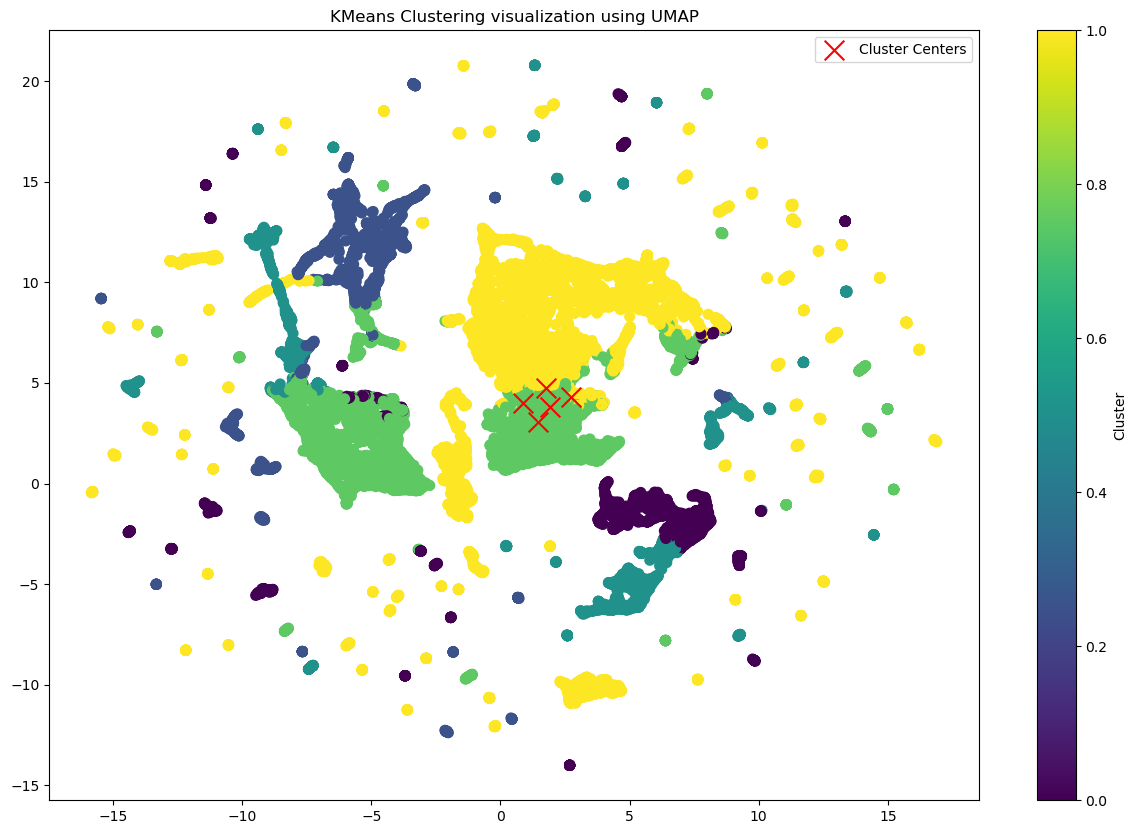

In [39]:
# Plot the clusters
plt.figure(figsize=(15, 10))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(Xc_umap[:, 0], Xc_umap[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.title('KMeans Clustering visualization using UMAP')
plt.colorbar(label='Cluster')
plt.legend(loc='upper right')
plt.show()

# Autoencoders

In [94]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LeakyReLU
from tensorflow.keras.models import Model

In [95]:
#zero mean and unit variance
data = (fb_data - np.mean(fb_data, axis=0)) / np.std(fb_data, axis=0)

In [96]:
data.min(), data.max()

(left_elbow       -2.339527
 right_elbow      -1.398860
 left_shoulder    -1.977568
 right_shoulder   -5.875932
 left_knee        -4.501785
 right_knee       -2.882825
 dtype: float64,
 left_elbow        1.422765
 right_elbow       2.287205
 left_shoulder     6.521802
 right_shoulder    4.251407
 left_knee         7.633389
 right_knee        9.263079
 dtype: float64)

In [97]:
data.shape

(23171, 6)

In [98]:
input_layer = Input(shape=(6,))

encoder_layer1 = Dense(4)(input_layer)
encoder_layer1 = LeakyReLU()(encoder_layer1)
encoded = Dense(2, activation=tf.keras.layers.LeakyReLU(alpha=0.3))(encoder_layer1)

decoder_layer1 = Dense(4)(encoded)
decoder_layer1 = LeakyReLU()(decoder_layer1)
decoded = Dense(6, activation=tf.keras.layers.LeakyReLU(alpha=0.3))(decoder_layer1)

autoencoder = Model(input_layer, decoded)

input_layer = Input(shape=(6,))

encoded = Dense(2, activation=tf.keras.layers.LeakyReLU(alpha=0.3))(input_layer)
decoded = Dense(6, activation=tf.keras.layers.LeakyReLU(alpha=0.3))(encoded)

autoencoder = Model(input_layer, decoded)

In [99]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(data, data, epochs=15, batch_size=32)

Epoch 1/15
725/725 [==============================] - 5s 6ms/step - loss: 0.7436
Epoch 2/15
725/725 [==============================] - 6s 8ms/step - loss: 0.5565
Epoch 3/15
725/725 [==============================] - 5s 7ms/step - loss: 0.4978
Epoch 4/15
725/725 [==============================] - 5s 7ms/step - loss: 0.4286
Epoch 5/15
725/725 [==============================] - 5s 7ms/step - loss: 0.3954
Epoch 6/15
725/725 [==============================] - 6s 9ms/step - loss: 0.3775
Epoch 7/15
725/725 [==============================] - 5s 7ms/step - loss: 0.3663
Epoch 8/15
725/725 [==============================] - 5s 7ms/step - loss: 0.3571
Epoch 9/15
725/725 [==============================] - 5s 7ms/step - loss: 0.3487
Epoch 10/15
725/725 [==============================] - 5s 8ms/step - loss: 0.3392
Epoch 11/15
725/725 [==============================] - 6s 8ms/step - loss: 0.3320
Epoch 12/15
725/725 [==============================] - 6s 8ms/step - loss: 0.3257
Epoch 13/15
725/725 [====

In [100]:
encoder = Model(input_layer, encoded)
reduced_data = encoder.predict(data)

725/725 [==============================] - 4s 6ms/step


In [101]:
#zero mean and unit variance
data_center = (centers - np.mean(centers, axis=0)) / np.std(centers, axis=0)
reduced_center = encoder.predict(data_center)

1/1 [==============================] - 0s 61ms/step


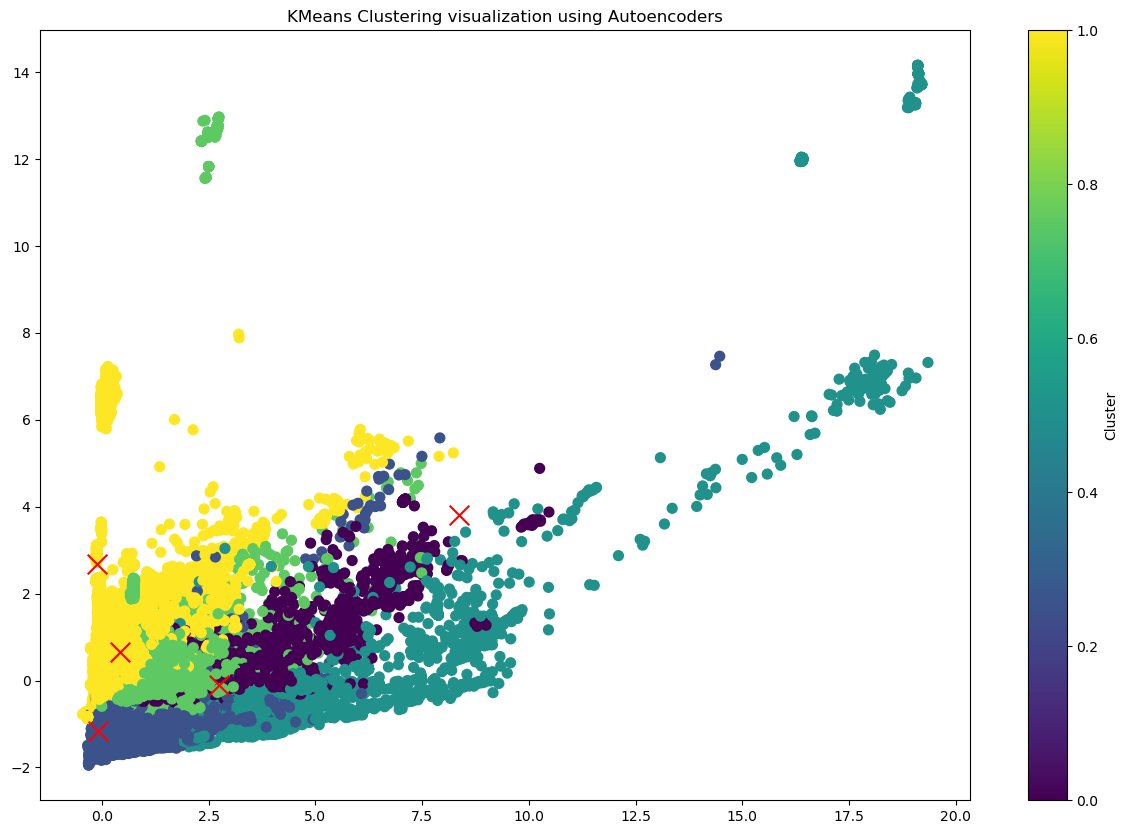

In [102]:
# Plot the clusters
plt.figure(figsize=(15, 10))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(reduced_center[:, 0], reduced_center[:, 1], c='red', marker='x', s=200, label='Cluster Centers')
plt.title('KMeans Clustering visualization using Autoencoders')
plt.colorbar(label='Cluster')
plt.show()